In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from metaspace.sm_annotation_utils import SMInstance
import getpass
sm = SMInstance()
sm

401 <Response [401]>
Unauthorized. Only public but not private datasets will be accessible.


SMInstance(https://metaspace2020.eu/graphql)

This notebook illustrates how to pull ion images for annotations from the [METASPACE platform](metaspace2020.eu). It will obtain and display all the isotope images for a set of annotations

### Enter your Email and Password

To get access to the private datasets submitted to Metespace you should provide your email and password.

**Notes:** 

- If you were logged in with Google Account, this won't work unfortunately. Please go to [Metaspace](http://metaspace2020.eu/) and create your password instead.
- Enter your email and password below

In [2]:
email = 'Your Metaspace Email'

In [3]:
#This cell should be executed and a promt for entering password will be given
password = getpass.getpass(prompt='Password: ', stream=None)
sm.login(email, password)

Password: ········
401 <Response [401]>
Unauthorized. Only public but not private datasets will be accessible.


### Analysis

In [4]:
# Choose the dataset name to get isotope images for
ds_name = 'untreated_test_private'

In [6]:
d = sm.dataset(name=ds_name)
results = sm.msm_scores([d], d.annotations()).T.sort_values(by=ds_name, ascending=False)
results.head()

,ds_name,untreated_test_private
formula,adduct,
C8H20NO6P,+K,0.962588
C44H80NO8P,+H,0.930079
C25H49NO4,+H,0.921879
C7H6O4,+Na,0.907797
C27H53NO4,+H,0.894105


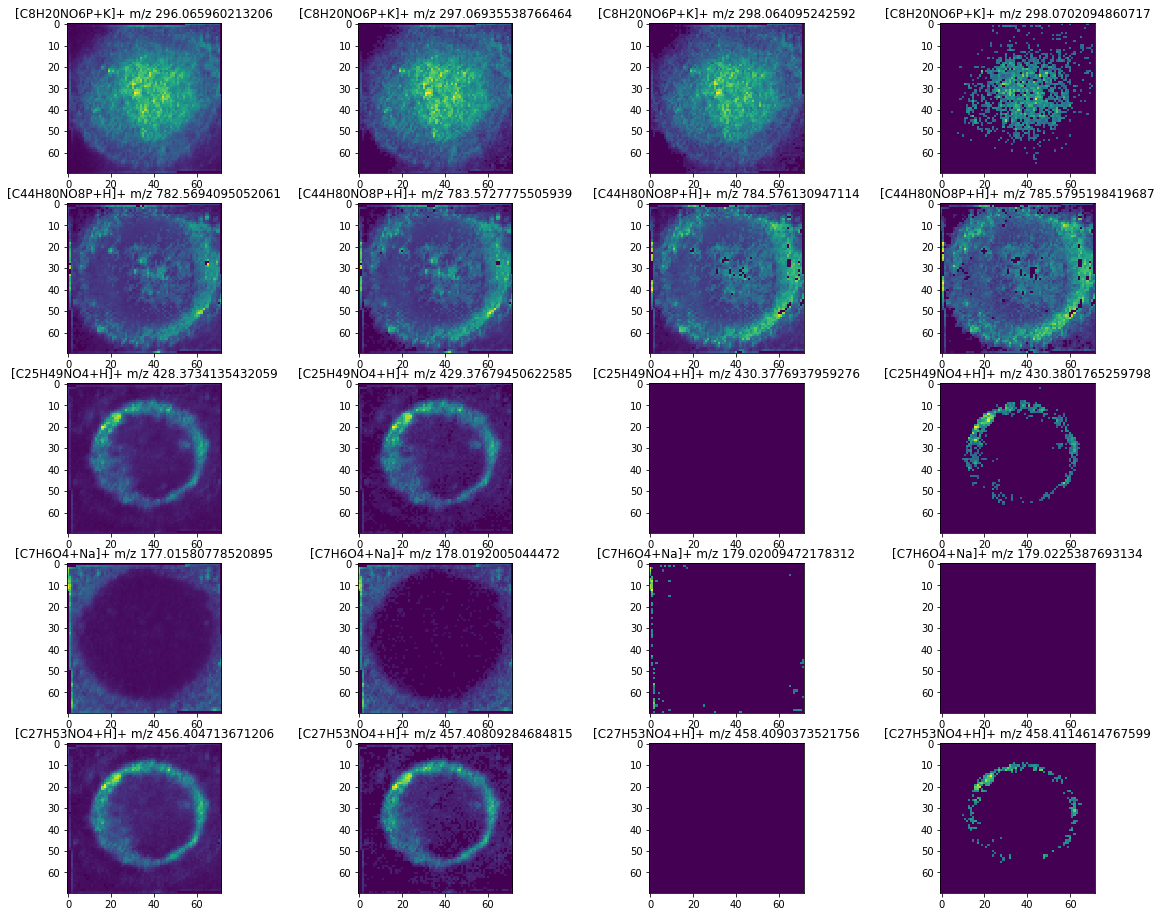

In [7]:
limit = 5 # number of annotations to get
plt.figure(figsize=(20, 16))
for ii in range(limit):
    row = results.iloc[ii]
    (sf, adduct) = row.name
    images = d.isotope_images(sf, adduct)
    for j, im in enumerate(images):
        plt.subplot(limit, 4, ii * 4 + j + 1)
        plt.title("[{}{}]+ m/z {}".format(sf, adduct, images.peak(index=j)))
        plt.imshow(images[j], cmap='viridis')
plt.show()